# Introdução
Este relatório faz uma análise da base de dados **Top 5000 Youtube channels data from Socialblade** (https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade), que é uma base com informações sobre os canais mais populares do Youtube. A finalidade deste relatório é dizer quais dos atributos numéricos desta base são os mais importantes para determinar o atributo categórico **Grade**.

  #  Base de dados e algumas informações sobre ela

In [30]:
import numpy as np
import pandas as pd
df=pd.read_csv('data.csv',na_values=['--','-- ','  '])



Uma amostra da base de dados:

In [31]:
df.head()

Rank Grade                Channel name  Video Uploads  Subscribers  \
0  1st  A++                       Zee TV        82757.0   18752951.0   
1  2nd  A++                     T-Series        12661.0   61196302.0   
2  3rd  A++   Cocomelon - Nursery Rhymes          373.0   19238251.0   
3  4th  A++                    SET India        27323.0   31180559.0   
4  5th  A++                          WWE        36756.0   32852346.0   

   Video views  
0  20869786591  
1  47548839843  
2   9793305082  
3  22675948293  
4  26273668433

Informações sobre os atributos dos elementos da base de dados:

In [61]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
Rank                    5000 non-null object
Grade                   5000 non-null object
Channel name            5000 non-null object
Video Uploads           5000 non-null float64
Subscribers             5000 non-null float64
Video views             5000 non-null int64
Subscribers StdSca      5000 non-null float64
Video views StdSca      5000 non-null float64
Video Uploads StdSca    5000 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 351.6+ KB


Video Uploads   Subscribers   Video views  Subscribers StdSca  \
count    5000.000000  5.000000e+03  5.000000e+03         5000.000000   
mean     3899.773040  2.417521e+06  1.071449e+09            0.000000   
std     17115.172883  3.835660e+06  2.003844e+09            1.000000   
min         1.000000  3.010000e+02  7.500000e+01          -16.575451   
25%       141.000000  4.579178e+05  1.862329e+08           -0.079689   
50%       445.000000  1.204652e+06  4.820548e+08            0.316209   
75%      1511.500000  2.723182e+06  1.124368e+09            0.510891   
max    422326.000000  6.599531e+07  4.754884e+10            0.630197   

       Video views StdSca  Video Uploads StdSca  
count         5000.000000          5.000000e+03  
mean             0.000000          2.273737e-17  
std              1.000000          1.000000e+00  
min            -23.194116         -2.444768e+01  
25%             -0.026408          1.395413e-01  
50%              0.294132          2.018544e-01  
75%              0.441759          2.196164e-01  
max              0.534697          2.277963e-01

  # Tratamento dos dados faltantantes

  ## **Grade**
  Visualizar dados para as linhas onde **Grade** é nulo.

In [33]:
df[df['Grade'].isnull()]


Rank Grade                  Channel name  Video Uploads  Subscribers  \
267     268th   NaN              MidnightXChannel            NaN          NaN   
517     518th   NaN                Dusama Pets TV            NaN          NaN   
2323  2,324th   NaN                        Random            NaN      12275.0   
3072  3,073rd   NaN  Boram Tube Toy Shcool [보람튜브…            NaN     726527.0   
3247  3,248th   NaN                 atheer sultan            NaN          NaN   
4898  4,899th   NaN                  ExzoticSlice            NaN      99785.0   

      Video views  
267     190256974  
517      91601494  
2323     17897584  
3072    205555289  
3247     79663674  
4898      9745292

  Usar a coluna  **Video views** para estimar o Grade, porque é a única coluna numérica que nunca é nula.
  
  Média de **Video views**  para cada **Grade**:

In [34]:
avgsOfVideoViewsForGrades=df.groupby('Grade')['Video views'].mean()
avgsOfVideoViewsForGrades


Grade
A       2.361317e+09
A+      6.053121e+09
A++     2.119909e+10
A-      1.041149e+09
B+      5.265217e+08
Name: Video views, dtype: float64

Preencher o campo **Grade** da linha, cujo campo Grade esta faltando, com o **Grade** para a qual a média de **Video views** seja a mais perto do **Video views** da linha.

In [35]:
linesWhereGradeIsNull=df[df['Grade'].isnull()].index
for line in linesWhereGradeIsNull:
    avgVideoViewsForGradeChoosedMinusVideoViewsForLine=0
    gradeChoosedToFill=""
    for grade in avgsOfVideoViewsForGrades.index:
        avgsOfVideoViewsForGradeMinusVideoViewsForLine= avgsOfVideoViewsForGrades[grade]-df.loc[line]['Video views']
        if(gradeChoosedToFill=="" or abs(avgVideoViewsForGradeChoosedMinusVideoViewsForLine)<abs(avgsOfVideoViewsForGradeMinusVideoViewsForLine)):
            avgVideoViewsForGradeChoosedMinusVideoViewsForLine=avgsOfVideoViewsForGradeMinusVideoViewsForLine
            gradeChoosedToFill=grade
        
    df.loc[line,'Grade']=gradeChoosedToFill


  Resultado do tratamento aplicado:

In [36]:
df.loc[linesWhereGradeIsNull]


Rank Grade                  Channel name  Video Uploads  Subscribers  \
267     268th  A++               MidnightXChannel            NaN          NaN   
517     518th  A++                 Dusama Pets TV            NaN          NaN   
2323  2,324th  A++                         Random            NaN      12275.0   
3072  3,073rd  A++   Boram Tube Toy Shcool [보람튜브…            NaN     726527.0   
3247  3,248th  A++                  atheer sultan            NaN          NaN   
4898  4,899th  A++                   ExzoticSlice            NaN      99785.0   

      Video views  
267     190256974  
517      91601494  
2323     17897584  
3072    205555289  
3247     79663674  
4898      9745292

  ## **Video Uploads**
  Linhas onde **Video Uploads** é nulo:

In [37]:
df[df['Video Uploads'].isnull()]


Rank Grade                  Channel name  Video Uploads  Subscribers  \
267     268th  A++               MidnightXChannel            NaN          NaN   
517     518th  A++                 Dusama Pets TV            NaN          NaN   
2323  2,324th  A++                         Random            NaN      12275.0   
3072  3,073rd  A++   Boram Tube Toy Shcool [보람튜브…            NaN     726527.0   
3247  3,248th  A++                  atheer sultan            NaN          NaN   
4898  4,899th  A++                   ExzoticSlice            NaN      99785.0   

      Video views  
267     190256974  
517      91601494  
2323     17897584  
3072    205555289  
3247     79663674  
4898      9745292

  Assumir que o **Video Uploads** faltante  da linha é igual a média de **Video Uploads** relacionado com o  **Grade** da linha.
  Médias de **Videos Uploads** relacionadas com os **Grades**:

In [38]:
avgsOfVideoUploadsForGrades=df.groupby('Grade')['Video Uploads'].mean()
avgsOfVideoUploadsForGrades



Grade
A        5357.026999
A+      16547.926829
A++     37450.700000
A-       4136.514648
B+       2985.988160
Name: Video Uploads, dtype: float64

In [39]:
linesWhereVideoUploadsIsNull=df[df['Video Uploads'].isnull()].index
for line in linesWhereVideoUploadsIsNull:
    df.loc[line,"Video Uploads"]=avgsOfVideoUploadsForGrades.loc[df.loc[line,"Grade"]]


  Resultado do tratamento aplicado:

In [62]:
df.loc[linesWhereVideoUploadsIsNull]

Rank Grade                  Channel name  Video Uploads  Subscribers  \
267     268th  A++               MidnightXChannel        37450.7      37450.7   
517     518th  A++                 Dusama Pets TV        37450.7      37450.7   
2323  2,324th  A++                         Random        37450.7      12275.0   
3072  3,073rd  A++   Boram Tube Toy Shcool [보람튜브…        37450.7     726527.0   
3247  3,248th  A++                  atheer sultan        37450.7      37450.7   
4898  4,899th  A++                   ExzoticSlice        37450.7      99785.0   

      Video views  Subscribers StdSca  Video views StdSca  \
267     190256974            0.620511            0.439751   
517      91601494            0.620511            0.488984   
2323     17897584            0.627075            0.525765   
3072    205555289            0.440861            0.432117   
3247     79663674            0.620511            0.494942   
4898      9745292            0.604260            0.529834   

      Video Uploads StdSca  
267              -1.960303  
517              -1.960303  
2323             -1.960303  
3072             -1.960303  
3247             -1.960303  
4898             -1.960303

  ## **Subscribers**
  Algumas linhas onde **Subscribers** é nulo:

In [41]:
df[df['Subscribers'].isnull()].head(20)


Rank Grade                        Channel name  Video Uploads  \
17    18th   A+                      Vlad and Nikita           53.0   
108  109th    A                               BIGFUN          373.0   
115  116th    A         Bee Kids Games - Children TV          740.0   
142  143rd    A                  ChiChi TV Siêu Nhân          421.0   
143  144th    A                       MusicTalentNow         1487.0   
152  153rd    A                       Family GamesTV          282.0   
156  157th    A                              KH Show           31.0   
175  176th    A                         LES BOYS TV2          116.0   
180  181st    A                            BIBO TOYS          313.0   
189  190th    A                         Kids Tv Show            8.0   
192  193rd    A   Happy Funny Kids Toys Pretend Play          850.0   
197  198th    A                   Learn Colors Keiki            6.0   
209  210th    A                     Ly LY ToysReview           33.0   
213  214th    A                  Beat chất lượng cao          563.0   
223  224th    A                     Purana Hindustan           91.0   
230  231st    A                          Happy Lives          188.0   
234  235th    A                Salih Reis'in Dünyası          237.0   
235  236th    A                      News ThatMatter          365.0   
238  239th    A                        PlayGammer100            7.0   
253  254th    A                             Flipkart          604.0   

     Subscribers  Video views  
17           NaN   1428274554  
108          NaN    941376171  
115          NaN    414535723  
142          NaN   2600394871  
143          NaN   3252752212  
152          NaN   1287242549  
156          NaN    106302038  
175          NaN    387595623  
180          NaN   1574657579  
189          NaN     86516866  
192          NaN   1778372917  
197          NaN     89116512  
209          NaN     90941513  
213          NaN    622132999  
223          NaN    501921413  
230          NaN    515722472  
234          NaN   2197191069  
235          NaN     77361248  
238          NaN       261227  
253          NaN    718345351

  Colocar a média de  **Subscribers** relacionada com o **Grade** que a linha possui se este valor é nulo.
  Médias de **Subscribers** relacionadas com os **Grades**:

In [42]:
avgsOfSubscribersForGrades=df.groupby('Grade')['Subscribers'].mean()
avgsOfSubscribersForGrades



Grade
A       5.107136e+06
A+      1.172695e+07
A++     1.720432e+07
A-      2.798520e+06
B+      1.535208e+06
Name: Subscribers, dtype: float64

In [43]:
linesWhereSubscribersIsNull=df[df['Subscribers'].isnull()].index
for line in linesWhereSubscribersIsNull:
    df.loc[line,"Subscribers"]=avgsOfVideoUploadsForGrades.loc[df.loc[line,"Grade"]]


Resultado para algumas linhas do tratamento aplicado:

In [44]:
df.loc[linesWhereSubscribersIsNull].head(20)


Rank Grade                        Channel name  Video Uploads  \
17    18th   A+                      Vlad and Nikita           53.0   
108  109th    A                               BIGFUN          373.0   
115  116th    A         Bee Kids Games - Children TV          740.0   
142  143rd    A                  ChiChi TV Siêu Nhân          421.0   
143  144th    A                       MusicTalentNow         1487.0   
152  153rd    A                       Family GamesTV          282.0   
156  157th    A                              KH Show           31.0   
175  176th    A                         LES BOYS TV2          116.0   
180  181st    A                            BIBO TOYS          313.0   
189  190th    A                         Kids Tv Show            8.0   
192  193rd    A   Happy Funny Kids Toys Pretend Play          850.0   
197  198th    A                   Learn Colors Keiki            6.0   
209  210th    A                     Ly LY ToysReview           33.0   
213  214th    A                  Beat chất lượng cao          563.0   
223  224th    A                     Purana Hindustan           91.0   
230  231st    A                          Happy Lives          188.0   
234  235th    A                Salih Reis'in Dünyası          237.0   
235  236th    A                      News ThatMatter          365.0   
238  239th    A                        PlayGammer100            7.0   
253  254th    A                             Flipkart          604.0   

      Subscribers  Video views  
17   16547.926829   1428274554  
108   5357.026999    941376171  
115   5357.026999    414535723  
142   5357.026999   2600394871  
143   5357.026999   3252752212  
152   5357.026999   1287242549  
156   5357.026999    106302038  
175   5357.026999    387595623  
180   5357.026999   1574657579  
189   5357.026999     86516866  
192   5357.026999   1778372917  
197   5357.026999     89116512  
209   5357.026999     90941513  
213   5357.026999    622132999  
223   5357.026999    501921413  
230   5357.026999    515722472  
234   5357.026999   2197191069  
235   5357.026999     77361248  
238   5357.026999       261227  
253   5357.026999    718345351

  # Análise exploratória
  ## Estatística clássica

  Distribuição para o número de inscritos:

In [64]:
df['Subscribers'].hist(bins=30)


  Distribuição para o número de visualizações:

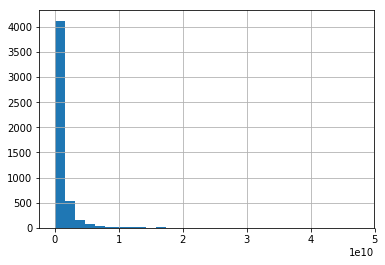

In [46]:
df['Video views'].hist(bins=30)


  Filtro para excluir canais fora da curva.

In [47]:
dfFilter=df[(df['Subscribers'] < 2000000)&(df['Video views'] < 1000000000)]


  Quantidade de elementos na base filtrada:

In [48]:
len(dfFilter)


3028

Dispersão para os elementos da base sem filtro por **Subscribers** e **Video views** :

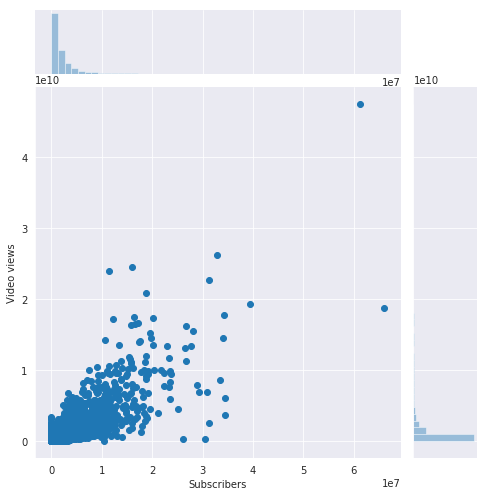

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.jointplot(height=7,x=df['Subscribers'], y=df['Video views'])



Dispersão para os elementos da base com filtro por **Subscribers** e **Video views** :

In [59]:
sns.jointplot(height=7,x=dfFilter['Subscribers'], y=dfFilter['Video views'])

  Dispersão dos elementos por **Subscribers** e **Video views** dividio por **Grade**:

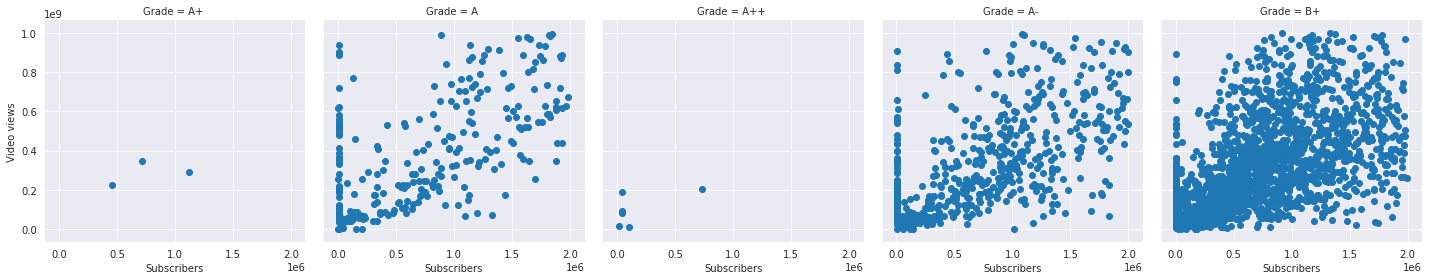

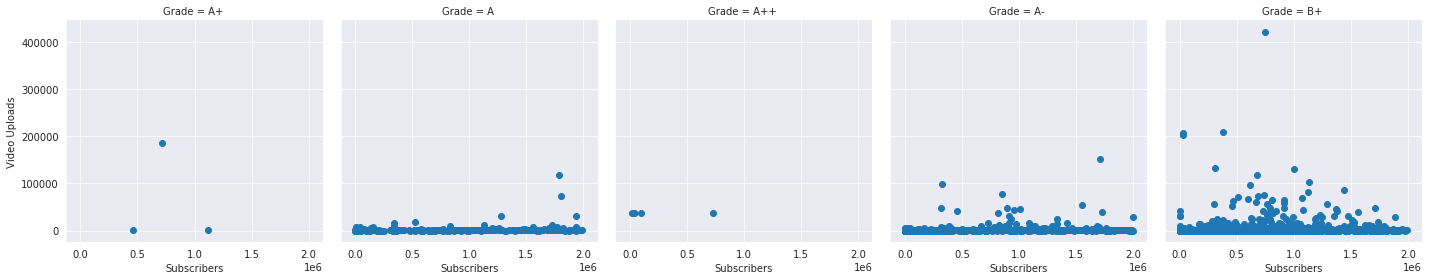

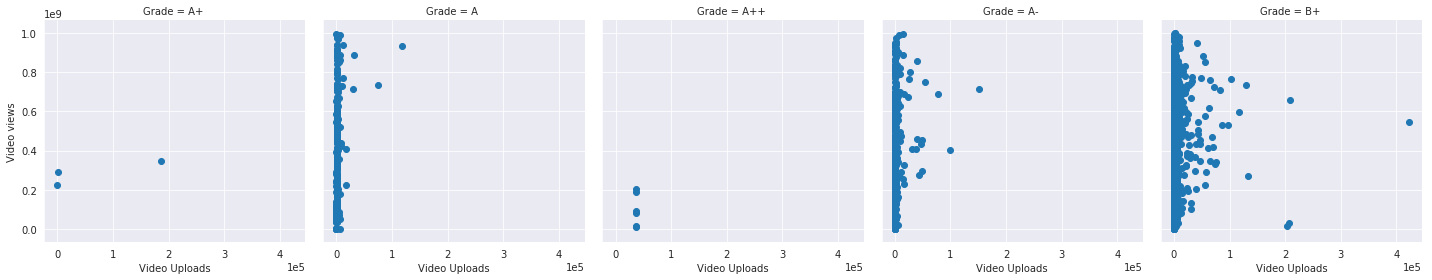

In [51]:
def dateplot(x, y, **kwargs):    
    plt.scatter(x=x, y=y, **kwargs)    
    plt.ticklabel_format(style='sci', axis='x',useOffset=False,scilimits=(0, 4))


g = sns.FacetGrid(dfFilter, col='Grade',height=4)
g = g.map(dateplot, 'Subscribers', 'Video views')

g = sns.FacetGrid(dfFilter, col='Grade',height=4)
g = g.map(dateplot, 'Subscribers', 'Video Uploads')

g = sns.FacetGrid(dfFilter, col='Grade',height=4)
g = g.map(dateplot, 'Video Uploads', 'Video views')




Boxplot para **Video views** dividio pelo **Grade**:

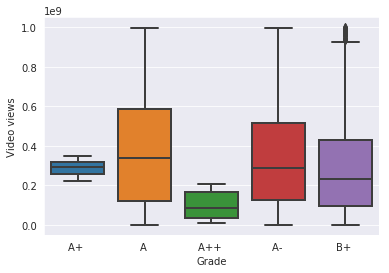

In [52]:
sns.boxplot(x="Grade", y="Video views", data=dfFilter,linewidth=2)


Boxplot para **Subscribers** dividio pela **Grade**

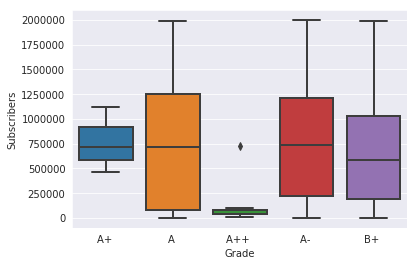

In [53]:
sns.boxplot(x="Grade", y="Subscribers", data=dfFilter,linewidth=2)

  ## Estudando os atributos da base por algoritmos de aprendizado de máquina
Foi feita uma árvore de decisão para estimar os atributos mais importantes na determinação do atributo **Grade**. A árvore foi feita com todos os elementos da base de dados e sua finalidade não foi de predição e sim de estudar o diagrama da árvore gerada, porque o algoritmo que cria árvores de decisão tende a colocar os atributos mais importantes para a predição do atributo desejado (neste caso o **Grade**) mais próximos do topo do diagrama.
  
Diagrama truncado da árvore de decisão:

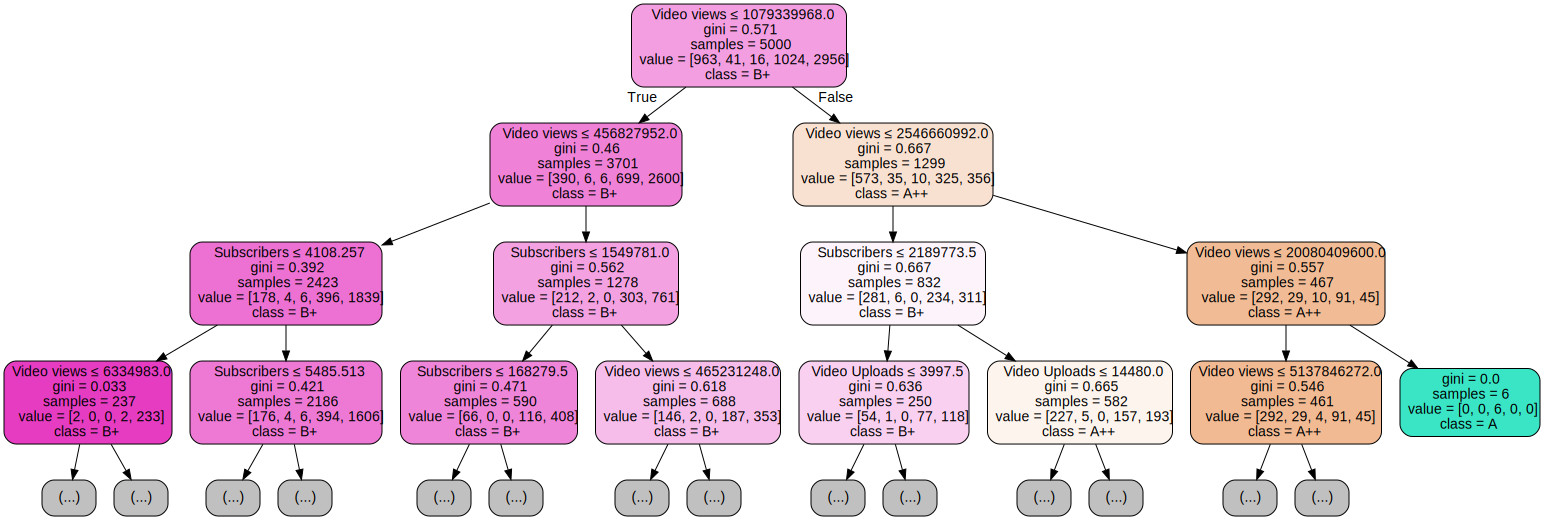

In [54]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier()
X=df[["Subscribers","Video views","Video Uploads"]]
Y=df["Grade"]
clf = clf.fit(X, Y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=Y.unique(),  
                                filled=True, rounded=True,
                                max_depth=3,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph                                



Observando o digrama nota-se que o atributo **Video Views** e o **Subscribers** são os mais importantes, isto porque eles são os atributos que mais aparecem nas caixas (nós da árvore) que estão mais altas no digrama. 

Pode-se observar também que quanto maior o **Video Views**  e o **Subscribers** melhor o **Grade** (assumindo que A++ é o melhor **Grade** e B+ o pior). Para entender isto é necessário entender como se lê o diagrama de uma árvore de decisão, a primeira linha de cada nó da árvore é uma pergunta caso seja respondida como sim deve-se seguir a seta a esquerda e caso o contrario segue-se a direita, o algoritmo da arvore de decisão faz isto ate achar um nó que não possui mais perguntas  (no digrama apresentado apenas o no verde não possui perguntas), caso você não queira ir mais adiante e deseje  parar em um nó que possui perguntas você ainda pode obter uma predição menos acurada que é dada pela ultima linha dentro do nó. Pode-se  notar então que caso seja respondido sim para as perguntas de menor ou igual para **Video Views**  e  **Subscribers** quase sempre é alcançado um nó cuja predição vai ser **Grade** B+.


Foi realizado um teste com  grupos de modelos de predição diferentes, utilizando validação cruzada para a média e desvio padrão da acurácia, em cada grupo de modelos predição é mudado ou algoritmo de geração do modelo e/ou o conjunto de atributos fornecidos como entrada. A hipótese é que atributos, ou conjuntos de atributos, que criam modelos de predição para o atributo **Grade** com pouca acurácia não são importantes na determinação do **Grade**. Foram testados os modelos predição gerados por redes neurais, KNN e árvore de decisão. Os conjuntos de atributos utilizados foram:
 - **Subscribers**, **Video views** e **Video Upload**
 - **Subscribers** e **Video views**
 - **Subscribers** e **Video Uploads**
 - **Video Uploads** e **Video views**
 - **Video views**
 - **Subscribers**
 - **Video Uploads**

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import neighbors

def stdScaler(data):
    avg=data.mean()
    std=data.std()
    return data.apply(lambda x: (avg-x)/std )

def applyMachineLearning(clfFactory,X,Y):
    #clfFactory             => Function to create classifier object
    #X                      => Elements attributes  in dataset
    #Y                      => Elements classes in dataset
    kf = KFold(n_splits=10,shuffle=True,random_state=3223)
    acuracy=[]
    for train_index, test_index in kf.split(X):
        X_train,X_test,  = X[train_index], X[test_index]
        Y_train,Y_test  = Y[train_index], Y[test_index]
        clf=clfFactory()
        clf=clf.fit(X_train,Y_train)
        acuracy.append(clf.score(X_test,Y_test))
    return acuracy


#apply z-socre to normalization of atributes================================
df['Subscribers StdSca']=stdScaler(df["Subscribers"])
df['Video views StdSca']=stdScaler(df["Video views"])
df['Video Uploads StdSca']=stdScaler(df["Video Uploads"])
#end=========================================================================

##input atributes sets to apply machine learning algorithm===================
xSubVvVu={"name":"Subscribers,Video views e Video Uploads", "data":df[["Subscribers StdSca","Video views StdSca","Video Uploads StdSca"]].values}

xSubVv={"name":"Subscribers e Video views", "data":df[["Subscribers StdSca","Video views StdSca"]].values}
xSubVu={"name":"Subscribers e Video Uploads", "data":df[["Subscribers StdSca","Video Uploads StdSca"]].values}
xVvVu={"name":"Video views e Video Uploads", "data":df[["Video views StdSca","Video Uploads StdSca"]].values}
xVv={"name":"Video views", "data":df[["Video views StdSca"]].values}
xVu={"name":"Video Uploads", "data":df[["Video Uploads StdSca"]].values}
xSub={"name":"Subscribers","data":df[["Subscribers StdSca"]].values}
#end=========================================================================

attributesSets=[xSub,xVu,xVv,xSubVu,xVvVu,xSubVv,xSubVvVu] # vector with the input attributes sets

#Constructors for the machine learning algorithms============================
knnFactory  = lambda : neighbors.KNeighborsClassifier(n_neighbors=5)
treeFactory = lambda : tree.DecisionTreeClassifier()
MLPFactory1  = lambda : MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(16,32,32, 16), random_state=1)
#end=========================================================================

algorithmsToMeasureAcuracy=[
                            {"name":'KNN',"algorithm":knnFactory},                            
                            {"name":'Árvore de decisão',"algorithm":treeFactory},
                            {"name":'Rede neural',"algorithm":MLPFactory1},
                           ]
Y=df["Grade"].values 
accuracyData={}


localizationToShowColumnsAtDataAboutAccuracy=[]

for attributesSet in attributesSets:
    X=attributesSet["data"]
    #print("Conjunto de atributos:" +attributesSet["name"])
    localizationToShowColumnsAtDataAboutAccuracy.append(attributesSet["name"])
    
    avgAcuracy=[]
    stdAcuracy=[]
    for algorithmToMeasureAcuracy in algorithmsToMeasureAcuracy:
        #print("    Nome do algoritmo: "+algorithmToMeasureAcuracy["name"])
        acuracy=applyMachineLearning(algorithmToMeasureAcuracy['algorithm'],X,Y)
       
        avg="{d0:.2f}%".format(d0=np.mean(np.array(acuracy,dtype=float))*100.0)
        std="{d0:.2f}%".format(d0=np.std(np.array(acuracy,dtype=float))*100.0)
        avgAcuracy.append(avg)
        stdAcuracy.append(std)        
        #print("        Média para a acurácia:{d0}%".format(d0=avg))
        #print("        Desvio padrão para a acurácia:{d0}%".format(d0=std ))

    accuracyData[attributesSet["name"]]=avgAcuracy+stdAcuracy

indexForData=[]
for algorithmToMeasureAcuracy in algorithmsToMeasureAcuracy:
    indexForData.append("Média "+algorithmToMeasureAcuracy["name"])
for algorithmToMeasureAcuracy in algorithmsToMeasureAcuracy:
    indexForData.append("Desvio padrão "+algorithmToMeasureAcuracy["name"])    

dataFrameWithTheAccuracyData=pd.DataFrame(accuracyData,index=indexForData)

dataFrameWithTheAccuracyData[localizationToShowColumnsAtDataAboutAccuracy]
#df.head()

Subscribers Video Uploads Video views  \
Média KNN                            58.00%        47.20%      57.06%   
Média Árvore de decisão              53.26%        45.92%      51.38%   
Média Rede neural                    62.32%        58.94%      64.54%   
Desvio padrão KNN                     2.14%         2.87%       2.36%   
Desvio padrão Árvore de decisão       1.93%         2.74%       2.30%   
Desvio padrão Rede neural             1.90%         1.69%       2.06%   

                                Subscribers e Video Uploads  \
Média KNN                                            55.58%   
Média Árvore de decisão                              54.26%   
Média Rede neural                                    63.02%   
Desvio padrão KNN                                     2.04%   
Desvio padrão Árvore de decisão                       1.42%   
Desvio padrão Rede neural                             1.73%   

                                Video views e Video Uploads  \
Média KNN                                            57.78%   
Média Árvore de decisão                              51.10%   
Média Rede neural                                    64.40%   
Desvio padrão KNN                                     1.62%   
Desvio padrão Árvore de decisão                       1.49%   
Desvio padrão Rede neural                             1.96%   

                                Subscribers e Video views  \
Média KNN                                          58.06%   
Média Árvore de decisão                            56.56%   
Média Rede neural                                  64.88%   
Desvio padrão KNN                                   2.35%   
Desvio padrão Árvore de decisão                     2.42%   
Desvio padrão Rede neural                           1.98%   

                                Subscribers,Video views e Video Uploads  
Média KNN                                                        58.18%  
Média Árvore de decisão                                          56.08%  
Média Rede neural                                                64.66%  
Desvio padrão KNN                                                 2.07%  
Desvio padrão Árvore de decisão                                   1.95%  
Desvio padrão Rede neural                                         2.16%

A tabela acima indica que **Video Uploads** é o atributo menos importante. Um dos motivos para isto é porque ele é o atributo que sozinho gerou os modelos com menores acurácias. Os modelos criados pela combinações **Subscribers**+**Video Uploads** e  **Video views**+**Video Uploads** foram piores que os modelos criados pela combinação **Subscribers**+**Video views** o que reforça que **Video Uploads** é o atributo menos importante para determinar o **Grade**, também pode-se observar que em alguns casos os modelos gerados pela combinação de **Video Uploads** com outros atributos são piores que os modelos criados com apenas um atributo algo que da mais força para a indicação de que **Video Uploads** não é importante. 

 ## Conclusão sobre a análise exploratória
 Este trabalho estudou como os atributos numéricos da base **Top 5000 Youtube channels data from Socialblade** influenciam o atributo categórico **Grade**. O atributo **Video views** é o mais importante para determinar o **Grade**, seguido pelo **Subscribers**, isto foi observado  pelos dados obtidos na Subseção **Estudando os atributos da base por algoritmos de aprendizado de máquina**. A análise da árvore de decisão gerada na mesma  subseção mostra que quanto maiores estes atributos melhor o **Grade**, assumindo que  A++ é o melhor **Grade** e B+ o pior **Grade**.
  